<a href="https://colab.research.google.com/github/NiceAlessandra/ColabStudies/blob/main/6ADS_IA_Nice_Rudson_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FATEC Guaratinguetá - 6° ADS - Inteligência Artificial - Prof. Cristovão

ELABORADO POR:

Nice Montarroyos e Rudson Nunes

OBJETIVO DO TRABALHO:

Realizar uma análise de dados e aplicar algum algoritmo de ML, para predizer algo, pode ser classificação ou regressão, escolher os dados, montar um notebook, e nele mesmo explicar o que você está fazendo e qual a conclusão da *pesquisa*

SERÃO ESTUDADAS:

Técnicas de limpeza de dados

Remoção de colunas não utilizadas

Recodificação de colunas categóricas em numéricas

Remoção de valores vazios

Divisão dos dados em treino e teste

Aplicação de algoritmos de aprendizado de máquina supervisionados para problemas de classificação

Algoritmos lineares

Algoritmos não-lineares

Algoritmos não-lineares complexos

Análise de métricas

Acurácia

Precisão

Sensibilidade

Matriz de confusão

Curva ROC e AUC

Curva de Precisão e Sensibilidade

Correlação

BASE DE DADOS

Os Indicadores de Desenvolvimento Mundial (WDI) são a principal coleção de indicadores de desenvolvimento do Banco Mundial, compilados de fontes internacionais oficialmente reconhecidas. Apresenta os dados de desenvolvimento global mais atuais e precisos disponíveis e inclui estimativas nacionais, regionais e globais.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pickle



Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregando os dados

In [ ]:
arquivo_data = '/content/drive/MyDrive/Colab Notebooks/DWI/WDIData.csv'
df_data = pd.read_csv(arquivo_data, delimiter=',')
df_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393143,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393144,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN,NaN,NaN
393145,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN,NaN,NaN
393146,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.400000,59.500000,59.700000,59.900000,60.100000,60.300000,60.500000,60.700000,NaN,NaN


In [ ]:
#arquivo_cseries = '/content/drive/MyDrive/Colab Notebooks/IAFinalNiceRud/WDICountry-Series.csv'
#df_cseries = pd.read_csv(arquivo_cseries, delimiter=',')

In [ ]:
#arquivo_country = '/content/drive/MyDrive/Colab Notebooks/IAFinalNiceRud/WDICountry.csv'
#df_country = pd.read_csv(arquivo_country, delimiter=',')

In [ ]:
#arquivo_seriestime = '/content/drive/MyDrive/Colab Notebooks/IAFinalNiceRud/WDISeries-Time.csv'
#df_seriestime = pd.read_csv(arquivo_seriestime, delimiter=',')

In [ ]:
#arquivo_series = '/content/drive/MyDrive/Colab Notebooks/IAFinalNiceRud/WDISeries.csv'
#df_series = pd.read_csv(arquivo_series, delimiter=',')

In [ ]:
#arquivo_foot = '/content/drive/MyDrive/Colab Notebooks/IAFinalNiceRud/WDIFootNote.csv'
#df_foot = pd.read_csv(arquivo_foot, delimiter=',')

In [ ]:
#df_combined = pd.concat([df_data, df_cseries, df_country, df_seriestime, df_foot, df_series])
#df_combined

In [ ]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


Verificando os campos do DataFrame

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393148 entries, 0 to 393147
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    393148 non-null  object 
 1   Country Code    393148 non-null  object 
 2   Indicator Name  393148 non-null  object 
 3   Indicator Code  393148 non-null  object 
 4   1960            38993 non-null   float64
 5   1961            44323 non-null   float64
 6   1962            45558 non-null   float64
 7   1963            46436 non-null   float64
 8   1964            46993 non-null   float64
 9   1965            49191 non-null   float64
 10  1966            49230 non-null   float64
 11  1967            49872 non-null   float64
 12  1968            50526 non-null   float64
 13  1969            51293 non-null   float64
 14  1970            68919 non-null   float64
 15  1971            75898 non-null   float64
 16  1972            77807 non-null   float64
 17  1973      

Seleciona as features e variavel target

In [ ]:
df_data.fillna(0, inplace=True)

In [ ]:
anos_drop = [str(ano) for ano in range(1960, 1999)]
X = df_data.drop(columns=['Country Name','Indicator Name', 'Indicator Code','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2022', 'Unnamed: 67'], axis=1)
X

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFE,11.580366,11.907943,12.285175,12.607641,12.990589,13.394404,13.835255,14.257120,14.687203,...,16.447499,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627
1,AFE,3.546244,3.713752,3.904902,4.093657,4.312080,4.530435,4.759641,5.004145,5.237581,...,6.224276,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137
2,AFE,32.604500,32.964159,33.409617,33.791497,34.220485,34.727444,35.159518,35.694984,36.102188,...,37.540749,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891
3,AFE,19.957302,19.975365,21.576500,22.529265,23.749531,23.493013,25.191221,26.807937,25.943316,...,31.666928,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609
4,AFE,8.623497,0.000000,0.000000,9.765491,10.910243,10.442796,12.518041,12.527150,12.986509,...,19.375171,18.672306,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393143,ZWE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
393144,ZWE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.700000,0.000000,0.000000,0.000000,5.400000,0.000000,0.000000
393145,ZWE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,32.400000,0.000000,0.000000,0.000000,33.700000,0.000000,0.000000
393146,ZWE,56.300000,56.600000,56.800000,57.000000,57.200000,57.400000,57.500000,57.700000,57.700000,...,58.900000,59.100000,59.400000,59.500000,59.700000,59.900000,60.100000,60.300000,60.500000,60.700000


In [ ]:
anos = [str(ano) for ano in range(2000, 2021)]

rounded_data = df_data[['Country Code'] + anos].round(2)
rounded_data


,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFE,11.58,11.91,12.29,12.61,12.99,13.39,13.84,14.26,14.69,...,16.03,16.45,16.91,17.39,17.89,18.36,18.80,19.30,19.79,20.28
1,AFE,3.55,3.71,3.90,4.09,4.31,4.53,4.76,5.00,5.24,...,5.96,6.22,6.47,6.72,7.02,7.28,7.51,7.81,8.08,8.37
2,AFE,32.60,32.96,33.41,33.79,34.22,34.73,35.16,35.69,36.10,...,37.18,37.54,37.87,38.18,38.54,38.80,39.04,39.32,39.64,39.89
3,AFE,19.96,19.98,21.58,22.53,23.75,23.49,25.19,26.81,25.94,...,28.91,31.67,31.70,31.86,33.90,38.85,40.20,43.03,44.39,46.27
4,AFE,8.62,0.00,0.00,9.77,10.91,10.44,12.52,12.53,12.99,...,16.10,19.38,18.67,17.62,16.52,24.59,25.39,27.04,29.14,31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393143,ZWE,0.00,0.00,0.00,0.00,0.00,0.00,24.30,0.00,0.00,...,16.90,0.00,0.00,0.00,14.50,0.00,0.00,0.00,0.00,0.00
393144,ZWE,0.00,0.00,0.00,0.00,0.00,0.00,4.60,0.00,0.00,...,3.90,0.00,0.00,0.00,3.70,0.00,0.00,0.00,5.40,0.00
393145,ZWE,0.00,0.00,0.00,0.00,0.00,0.00,33.60,0.00,0.00,...,30.50,0.00,0.00,0.00,32.40,0.00,0.00,0.00,33.70,0.00
393146,ZWE,56.30,56.60,56.80,57.00,57.20,57.40,57.50,57.70,57.70,...,58.60,58.90,59.10,59.40,59.50,59.70,59.90,60.10,60.30,60.50


In [ ]:
grouped_data = rounded_data.groupby('Country Code', as_index=False)[anos].sum()
grouped_data

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,9.832207e+10,1.009078e+11,9.671610e+10,1.051634e+11,1.327229e+11,1.399530e+11,1.527390e+11,1.612015e+11,1.763569e+11,...,1.648378e+11,1.369528e+11,1.336728e+11,1.381492e+11,1.678458e+11,1.453121e+11,1.556200e+11,1.588981e+11,1.608877e+11,1.074756e+11
1,AFE,1.321307e+13,1.326034e+13,1.403554e+13,1.557572e+13,1.797616e+13,1.930756e+13,2.127684e+13,2.349348e+13,2.515314e+13,...,2.908277e+13,2.948352e+13,3.044166e+13,3.145762e+13,3.090478e+13,3.077339e+13,3.276235e+13,3.370362e+13,3.411569e+13,3.209788e+13
2,AFG,3.254008e+09,5.849116e+09,2.264474e+12,2.546740e+12,2.674751e+12,3.099589e+12,3.876642e+12,5.003720e+12,6.062895e+12,...,1.167793e+13,1.308496e+13,1.423351e+13,1.463576e+13,1.506201e+13,1.514980e+13,1.578219e+13,1.416715e+13,1.532638e+13,1.587890e+13
3,AFW,7.360153e+12,8.250864e+12,9.272027e+12,1.022258e+13,1.117238e+13,1.267103e+13,1.416769e+13,1.615365e+13,1.758313e+13,...,2.108688e+13,2.207412e+13,2.427586e+13,2.571133e+13,2.473191e+13,2.373104e+13,2.408576e+13,2.576068e+13,2.716455e+13,2.608082e+13
4,AGO,2.087426e+12,3.567161e+12,1.535883e+13,2.419779e+13,3.276685e+13,4.887048e+13,6.567399e+13,7.832668e+13,1.023935e+14,...,1.571079e+14,1.761880e+14,1.894469e+14,2.038442e+14,1.963092e+14,2.267492e+14,2.668948e+14,3.259272e+14,3.794945e+14,3.755414e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,3.684737e+08,1.837410e+09,1.913742e+09,2.497840e+09,1.048598e+10,1.127803e+10,1.321570e+10,1.860330e+10,2.539960e+11,...,3.211743e+11,3.278728e+11,3.445355e+11,3.599807e+11,3.602556e+11,3.804199e+11,4.048913e+11,4.305210e+11,4.506175e+11,4.380422e+11
262,YEM,1.122312e+13,1.211873e+13,1.367360e+13,1.568743e+13,1.829408e+13,2.242676e+13,2.668022e+13,3.055628e+13,3.686434e+13,...,5.227455e+13,5.685238e+13,6.332085e+13,5.983362e+13,6.087455e+13,5.505938e+13,6.209844e+13,7.135087e+13,5.892948e+10,5.207523e+10
263,ZAF,4.342029e+13,4.517514e+13,4.883033e+13,5.247320e+13,5.760352e+13,6.279715e+13,6.943495e+13,7.664837e+13,8.181218e+13,...,9.544232e+13,9.941710e+13,1.045995e+14,1.085065e+14,1.151422e+14,1.198057e+14,1.260778e+14,1.305659e+14,1.355236e+14,1.322570e+14
264,ZMB,4.206148e+11,4.735486e+11,5.270190e+11,5.973173e+11,7.094902e+11,8.049918e+11,9.453807e+11,1.085269e+12,1.244457e+12,...,2.307938e+12,2.636039e+12,2.934526e+12,3.218717e+12,3.592127e+12,3.814977e+12,4.405168e+12,4.785129e+12,5.093929e+12,5.628630e+12


In [ ]:
X = grouped_data.drop(columns=['Country Code'], axis=1)
X

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,9.832207e+10,1.009078e+11,9.671610e+10,1.051634e+11,1.327229e+11,1.399530e+11,1.527390e+11,1.612015e+11,1.763569e+11,1.359052e+11,...,1.648378e+11,1.369528e+11,1.336728e+11,1.381492e+11,1.678458e+11,1.453121e+11,1.556200e+11,1.588981e+11,1.608877e+11,1.074756e+11
1,1.321307e+13,1.326034e+13,1.403554e+13,1.557572e+13,1.797616e+13,1.930756e+13,2.127684e+13,2.349348e+13,2.515314e+13,2.479502e+13,...,2.908277e+13,2.948352e+13,3.044166e+13,3.145762e+13,3.090478e+13,3.077339e+13,3.276235e+13,3.370362e+13,3.411569e+13,3.209788e+13
2,3.254008e+09,5.849116e+09,2.264474e+12,2.546740e+12,2.674751e+12,3.099589e+12,3.876642e+12,5.003720e+12,6.062895e+12,8.570592e+12,...,1.167793e+13,1.308496e+13,1.423351e+13,1.463576e+13,1.506201e+13,1.514980e+13,1.578219e+13,1.416715e+13,1.532638e+13,1.587890e+13
3,7.360153e+12,8.250864e+12,9.272027e+12,1.022258e+13,1.117238e+13,1.267103e+13,1.416769e+13,1.615365e+13,1.758313e+13,1.763070e+13,...,2.108688e+13,2.207412e+13,2.427586e+13,2.571133e+13,2.473191e+13,2.373104e+13,2.408576e+13,2.576068e+13,2.716455e+13,2.608082e+13
4,2.087426e+12,3.567161e+12,1.535883e+13,2.419779e+13,3.276685e+13,4.887048e+13,6.567399e+13,7.832668e+13,1.023935e+14,8.930303e+13,...,1.571079e+14,1.761880e+14,1.894469e+14,2.038442e+14,1.963092e+14,2.267492e+14,2.668948e+14,3.259272e+14,3.794945e+14,3.755414e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,3.684737e+08,1.837410e+09,1.913742e+09,2.497840e+09,1.048598e+10,1.127803e+10,1.321570e+10,1.860330e+10,2.539960e+11,2.696642e+11,...,3.211743e+11,3.278728e+11,3.445355e+11,3.599807e+11,3.602556e+11,3.804199e+11,4.048913e+11,4.305210e+11,4.506175e+11,4.380422e+11
262,1.122312e+13,1.211873e+13,1.367360e+13,1.568743e+13,1.829408e+13,2.242676e+13,2.668022e+13,3.055628e+13,3.686434e+13,3.693264e+13,...,5.227455e+13,5.685238e+13,6.332085e+13,5.983362e+13,6.087455e+13,5.505938e+13,6.209844e+13,7.135087e+13,5.892948e+10,5.207523e+10
263,4.342029e+13,4.517514e+13,4.883033e+13,5.247320e+13,5.760352e+13,6.279715e+13,6.943495e+13,7.664837e+13,8.181218e+13,8.269991e+13,...,9.544232e+13,9.941710e+13,1.045995e+14,1.085065e+14,1.151422e+14,1.198057e+14,1.260778e+14,1.305659e+14,1.355236e+14,1.322570e+14
264,4.206148e+11,4.735486e+11,5.270190e+11,5.973173e+11,7.094902e+11,8.049918e+11,9.453807e+11,1.085269e+12,1.244457e+12,1.347818e+12,...,2.307938e+12,2.636039e+12,2.934526e+12,3.218717e+12,3.592127e+12,3.814977e+12,4.405168e+12,4.785129e+12,5.093929e+12,5.628630e+12


In [ ]:
y = grouped_data['Country Code']
y

0      ABW
1      AFE
2      AFG
3      AFW
4      AGO
      ... 
261    XKX
262    YEM
263    ZAF
264    ZMB
265    ZWE
Name: Country Code, Length: 266, dtype: object

Divide em treino e teste

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
53,6.780484e+11,7.060083e+11,7.400069e+11,8.057810e+11,8.848096e+11,9.778925e+11,1.073057e+12,1.197382e+12,1.413774e+12,1.423405e+12,...,1.464418e+12,1.435249e+12,1.270793e+12,1.356535e+12,1.348114e+12,1.268038e+12,1.439135e+12,1.515468e+12,1.690780e+12,1.426093e+12
184,2.074748e+14,2.117522e+14,2.195920e+14,2.347256e+14,2.555650e+14,2.835686e+14,3.113053e+14,3.322239e+14,3.550022e+14,3.854035e+14,...,4.562252e+14,4.870964e+14,5.245324e+14,5.688839e+14,6.080601e+14,6.740261e+14,7.250186e+14,7.901103e+14,8.556116e+14,8.948215e+14
46,3.841138e+12,4.116598e+12,4.296930e+12,4.506813e+12,4.679006e+12,4.833441e+12,5.052272e+12,5.408247e+12,5.779901e+12,6.064116e+12,...,6.731081e+12,7.223004e+12,7.534233e+12,7.785769e+12,7.926817e+12,8.219671e+12,8.638641e+12,9.123825e+12,9.522406e+12,9.511215e+12
131,3.994660e+10,4.145950e+10,4.588801e+10,4.305620e+10,6.873263e+10,6.959631e+10,8.184802e+10,9.023744e+10,9.580104e+10,8.860963e+10,...,9.100696e+10,9.592034e+10,8.278706e+10,8.844951e+10,9.574693e+10,8.959959e+10,9.556646e+10,8.755500e+10,8.672377e+10,8.058531e+10
56,3.537989e+11,3.703785e+11,3.923214e+11,4.341248e+11,4.634414e+11,4.998070e+11,5.455134e+11,5.936253e+11,7.021150e+11,7.617229e+11,...,8.478947e+11,9.534957e+11,1.074698e+13,1.035330e+13,1.095998e+13,1.148515e+13,1.332125e+13,1.358273e+13,1.464745e+13,1.364824e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3.041131e+09,3.122060e+09,3.361483e+09,3.466662e+09,3.524062e+09,3.830841e+09,8.292498e+09,9.047999e+09,9.317784e+09,9.045897e+09,...,1.080374e+10,1.211007e+10,1.281541e+10,1.454290e+10,1.639937e+10,1.548031e+10,1.659109e+10,1.690818e+10,1.695452e+10,1.606512e+10
193,1.070880e+10,1.290608e+10,1.319389e+10,5.970257e+10,6.530519e+10,7.604663e+10,7.955086e+10,8.276365e+10,8.965703e+10,8.873132e+10,...,1.092412e+11,1.186456e+11,1.244328e+11,1.323740e+11,1.363267e+11,1.402281e+11,1.441681e+11,2.265028e+11,8.677898e+09,3.418458e+09
7,3.245012e+13,3.720263e+13,3.800768e+13,4.077237e+13,4.593146e+13,5.119186e+13,5.850245e+13,6.358716e+13,7.403272e+13,6.969391e+13,...,8.229300e+13,8.882036e+13,9.272696e+13,9.629988e+13,8.649775e+13,8.552579e+13,9.244842e+13,9.660876e+13,1.028428e+14,9.181240e+13
78,9.092019e+10,9.934356e+10,1.020962e+11,1.057646e+11,1.083814e+11,1.122117e+11,1.276578e+11,1.395550e+11,1.553845e+11,1.446127e+11,...,1.675753e+11,1.622192e+11,1.725847e+11,1.831623e+11,2.047961e+11,2.023616e+11,2.115292e+11,2.161129e+11,2.317858e+11,2.241047e+11


In [ ]:
X_test

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
187,1.124672e+14,1.197977e+14,1.273000e+14,1.360102e+14,1.480489e+14,1.590830e+14,1.707520e+14,1.828037e+14,1.983346e+14,2.043958e+14,...,2.386342e+14,2.582481e+14,2.796102e+14,3.032378e+14,3.171422e+14,3.459072e+14,3.785735e+14,4.110173e+14,4.360918e+14,3.980373e+14
168,1.023936e+13,9.960757e+12,1.120165e+13,1.222489e+13,1.337072e+13,1.431143e+13,1.606329e+13,1.785171e+13,1.994367e+13,2.333674e+13,...,2.868946e+13,3.179917e+13,3.798544e+13,4.463773e+13,5.149881e+13,6.103521e+13,7.455935e+13,8.104328e+13,9.026976e+13,9.207130e+13
263,4.342029e+13,4.517514e+13,4.883033e+13,5.247320e+13,5.760352e+13,6.279715e+13,6.943495e+13,7.664837e+13,8.181218e+13,8.269991e+13,...,9.544232e+13,9.941710e+13,1.045995e+14,1.085065e+14,1.151422e+14,1.198057e+14,1.260778e+14,1.305659e+14,1.355236e+14,1.322570e+14
189,4.074032e+11,4.099461e+11,4.300614e+11,4.289292e+11,4.513276e+11,2.488101e+11,4.617731e+11,5.220529e+11,5.674288e+11,5.806774e+11,...,7.854200e+11,8.184717e+11,8.753079e+11,1.070976e+12,1.129452e+12,1.134213e+12,1.252283e+12,1.294875e+12,1.351017e+12,1.296576e+12
144,1.971971e+12,2.193531e+12,2.320043e+12,2.593276e+12,3.003039e+12,3.477869e+12,3.843039e+12,4.573088e+12,4.400550e+12,4.109662e+12,...,4.631615e+12,4.673779e+12,5.436562e+12,6.039217e+12,5.855057e+12,5.788414e+12,6.472862e+12,6.523638e+12,6.736182e+12,6.721503e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,8.378162e+13,8.358867e+13,8.144361e+13,8.390340e+13,9.154093e+13,1.005868e+14,1.116251e+14,1.245100e+14,1.347224e+14,1.293772e+14,...,1.607402e+14,1.656672e+14,1.703032e+14,1.725420e+14,1.617409e+14,1.602020e+14,1.696253e+14,1.724618e+14,1.731351e+14,1.558688e+14
265,1.188646e+12,1.191549e+12,1.116041e+12,9.313295e+11,8.844633e+11,9.423647e+11,8.846857e+11,8.480510e+11,7.284044e+11,1.552617e+12,...,2.125628e+12,2.487144e+12,2.487249e+12,2.513260e+12,2.739225e+12,2.725540e+12,2.799524e+12,3.571647e+12,4.881260e+12,1.726294e+13
243,1.759606e+12,1.897565e+12,1.941377e+12,2.092834e+12,2.287139e+12,2.390254e+12,2.578942e+12,2.832820e+12,3.103310e+12,3.116101e+12,...,3.578623e+12,3.747409e+12,3.715454e+12,3.861560e+12,3.858870e+12,3.942864e+12,4.115456e+12,4.361857e+12,4.492157e+12,4.204150e+12
205,2.786363e+13,2.736501e+13,2.775847e+13,3.132547e+13,3.640881e+13,4.381532e+13,4.953168e+13,5.350974e+13,6.288833e+13,5.538217e+13,...,8.074985e+13,8.784434e+13,8.938664e+13,9.161647e+13,8.327956e+13,8.110294e+13,8.491924e+13,8.953297e+13,9.203096e+13,8.243348e+13


Treinar o modelo com os principais algorítimos supervisionados de Classificação

In [ ]:
LR  = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
#LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)
DT  = DecisionTreeClassifier().fit(X_train, y_train)
KN  = KNeighborsClassifier().fit(X_train, y_train)
#SVM = SVC().fit(X_train, y_train)
#RF  = RandomForestClassifier().fit(X_train, y_train)

Gerando os graficos

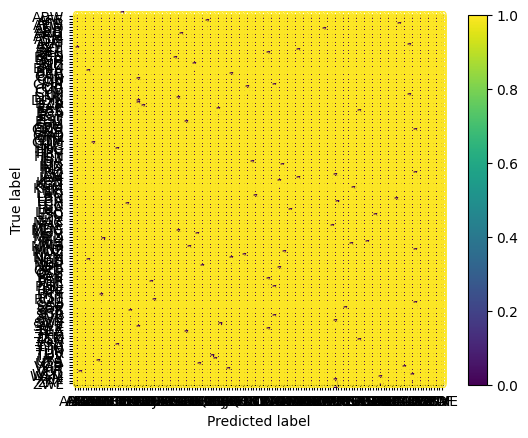

<Figure size 2000x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, DT.predict(X_test))
plt.figure(figsize=(20, 12))  # Ajustar o tamanho da figura
plt.show();

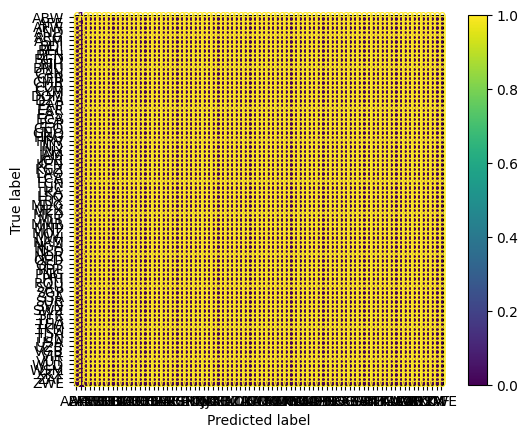

<Figure size 10000x5000 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR, X_test, y_test)
plt.figure(figsize=(100, 50))  # Ajustar o tamanho da figura
plt.show();

In [ ]:
print("Acurácia LR:", LR.score(X_test, y_test), "\n")
#print("Acurácia LDA:", LDA.score(X_test, y_test), "\n")
print("Acurácia DT:", DT.score(X_test, y_test), "\n")
print("Acurácia KN:", KN.score(X_test, y_test), "\n")
#print("Acurácia SVM:", SVM.score(X_test, y_test), "\n")
#print("Acurácia RF:", RF.score(X_test, y_test), "\n")

Acurácia LR: 0.0 

Acurácia DT: 0.0 

Acurácia KN: 0.0 



In [ ]:
metricas = {'Accuracy': [LR.score(X_test, y_test),
                         #LDA.score(X_test, y_test),
                         DT.score(X_test, y_test),
                         KN.score(X_test, y_test),
                         #SVM.score(X_test, y_test),
                         #RF.score(X_test, y_test)
                         ],
            'Precision': [precision_score(y_test, LR.predict(X_test)),
                      #precision_score(y_test, LDA.predict(X_test)),
                      precision_score(y_test, DT.predict(X_test)),
                      precision_score(y_test, KN.predict(X_test)),
                      #precision_score(y_test, SVM.predict(X_test)),
                      #precision_score(y_test, RF.predict(X_test))
                      ],
            'Recall' : [recall_score(y_test, RF.predict(X_test)),
                    #recall_score(y_test, LDA.predict(X_test)),
                    recall_score(y_test, DT.predict(X_test)),
                    recall_score(y_test, KN.predict(X_test)),
                    #recall_score(y_test, SVM.predict(X_test)),
                    #recall_score(y_test, RF.predict(X_test))
                    ],
            'F1' : [f1_score(y_test, RF.predict(X_test)),
                    #f1_score(y_test, LDA.predict(X_test)),
                    f1_score(y_test, DT.predict(X_test)),
                    f1_score(y_test, KN.predict(X_test)),
                    #f1_score(y_test, SVM.predict(X_test)),
                    #f1_score(y_test, RF.predict(X_test))
                    ]
        }

dados = pd.DataFrame(metricas,
                     columns = ['Accuracy', 'Precision','Recall','F1'],
                     index=['LR','DT','KNN'])#'SVM',,'RF','LDA'

dados

Pesquisar: ROC curve, predict curve e recall curve.

In [ ]:
RocCurveDisplay.from_estimator(LR,  X_test, y_test, ax=plt.gca())
#RocCurveDisplay.from_estimator(LDA, X_test, y_test, ax=plt.gca())
RocCurveDisplay.from_estimator(DT,  X_test, y_test, ax=plt.gca())
RocCurveDisplay.from_estimator(KN,  X_test, y_test, ax=plt.gca())
#RocCurveDisplay.from_estimator(SVM, X_test, y_test, ax=plt.gca())
#RocCurveDisplay.from_estimator(RF,  X_test, y_test, ax=plt.gca())
plt.show();

Curva Precision Recall

In [ ]:
PrecisionRecallDisplay.from_estimator(LR,  X_test, y_test, ax=plt.gca())
#PrecisionRecallDisplay.from_estimator(LDA, X_test, y_test, ax=plt.gca())
PrecisionRecallDisplay.from_estimator(DT,  X_test, y_test, ax=plt.gca())
PrecisionRecallDisplay.from_estimator(KN,  X_test, y_test, ax=plt.gca())
#PrecisionRecallDisplay.from_estimator(SVM, X_test, y_test, ax=plt.gca())
#PrecisionRecallDisplay.from_estimator(RF,  X_test, y_test, ax=plt.gca())
plt.show();

#Conclusão

Para realizarmos o trabalho, a primeira dificuldade enfrentada foi encontrar uma base de dados com quantidade e qualidade nas informações. Fomos de um extremo ao outro, de uma planilha com pouquíssima informação a outra, que decidimos utilizar neste estudo, que é composta por 6 (seis) arquivos que se complementam, mas que, infelizmente, decidimos não utilizar todas, considerando o grande volume de dados.

Tentamos arredondar algumas informações para que não houvessem números com tantas casas decimais e a saída nos gráficos ficasse mais legível.
Quando fomos fazer o 'group by' pelo 'Country Code', somando o valor dos anos, o 'rounded' parou de funcionar.
As operações de treino e teste, rodaram corretamente, e não tivemos nenhum problema nas saídas das tabelas.
Quando iniciamos o treino do modelo, num primeiro momento, o algoritmo SVC, foi anulado, após uma hora e dez minutos de uma tentativa não finalizada, após comentarmos a linha do código deste algoritmo, tivemos uma mensagem de incapacidade da memória RAM da máquina durante o processamento do algorítmo RF, sendo assim, paramos novamente e o comentamos. Já para o algoritmo LDA, que apresentou um erro informando que o número de amostras precisa ser maior que o número de classes, também tivemos que comentar a linha, pois não conseguimos achar uma solução razoável para resolver o problema.

Para os gráficos da matriz de confusão apresentados, concluimos que quantidade de dados pode ser um problema, pois tentamos ajustar o tamanho da imagem (sem sucesso) e a qualidade de apresentação e leitura dos dados, ficou completamente comprometida, apesar da nossa tentativa de melhorar filtros, casas decimais e arredondamentos. Neste momento, ficou claro para nós que os dados separados para uso e análise não eram confiáveis ou que, devido a nossa inexperiência no assunto, não soubemos tratar / lidar com os dados de forma adequada para que pudéssemos alcançar bons resultados e retornos nas análises.
Desta forma, os dados relacionados a acurácia apresentada pelos algoritmos treinados, ficaram comprometidos, pois todos os eles resultaram em zero, ou seja, não conseguimos uma boa solução.
A partir da acurácia, os códigos passaram a apresentar erros nas métricas, e nas curvas ROC e de precisão recall, que também não conseguimos resolver de forma adequada para que pudéssemos seguir com a execução do código sem erros.

Apesar de não conseguirmos finalizar as operações com sucesso, notamos que nosso entendimento na linguagem python para análises futuras ocorrerá de forma diferente, considerando o aprendizado, as dificuldades e as pesquisas realizadas para apresentar esta tarefa. Vale ressaltar que esta solução apresentada é a nossa segunda tentativa, pois a primeira apresentou resultados ainda mais insatisfatórios, pois a base de dados era composta por muitos dados em formato de texto, o que demandou muito tempo no tratamento dos dados e que, ainda assim, ao final, percebemos que, mesmo após tratados, não conseguimos alcançar um resultado satisfatório e coerente, já que a nossa acurácia de treino e teste estava com resultados negativos.